In [1]:
import pandas as pd
from glob import glob
import os

In [2]:
stat_files = glob("store_data/지역*.xls")
stat_files

['store_data\\지역_위치별(주유소) (1).xls',
 'store_data\\지역_위치별(주유소) (10).xls',
 'store_data\\지역_위치별(주유소) (11).xls',
 'store_data\\지역_위치별(주유소) (12).xls',
 'store_data\\지역_위치별(주유소) (2).xls',
 'store_data\\지역_위치별(주유소) (3).xls',
 'store_data\\지역_위치별(주유소) (4).xls',
 'store_data\\지역_위치별(주유소) (5).xls',
 'store_data\\지역_위치별(주유소) (6).xls',
 'store_data\\지역_위치별(주유소) (7).xls',
 'store_data\\지역_위치별(주유소) (8).xls',
 'store_data\\지역_위치별(주유소) (9).xls',
 'store_data\\지역_위치별(주유소).xls']

In [3]:
tmp_raw = []

for file_name in stat_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
len(tmp_raw)

13

In [4]:
stat_raw = pd.concat(tmp_raw)
stat_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 41
Data columns (total 10 columns):
지역       294 non-null object
상호       294 non-null object
주소       294 non-null object
상표       294 non-null object
전화번호     294 non-null object
셀프여부     294 non-null object
고급휘발유    294 non-null object
휘발유      294 non-null object
경유       294 non-null object
실내등유     294 non-null object
dtypes: object(10)
memory usage: 25.3+ KB


In [5]:
stat_raw.shape

(294, 10)

In [6]:
stat_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1355,1255,-
1,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,-,1365,1265,-
2,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1387,1298,-
3,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,1418,1318,-
4,서울특별시,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1438,1338,-


In [7]:
stations = pd.DataFrame({'Oil_store':stat_raw['상호'],'주소':stat_raw['주소'],'휘발유가격':stat_raw['휘발유'],
                         '셀프여부':stat_raw['셀프여부'],'상표':stat_raw['상표']})

In [8]:
stations.head()

,Oil_store,주소,휘발유가격,셀프여부,상표
0,동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),1355,Y,GS칼텍스
1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1365,N,GS칼텍스
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1387,N,현대오일뱅크
3,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1418,Y,S-OIL
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1438,Y,GS칼텍스


In [9]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]  # 구별로 정보 분류
stations  

,Oil_store,주소,휘발유가격,셀프여부,상표,구
0,동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),1355,Y,GS칼텍스,강동구
1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1365,N,GS칼텍스,강동구
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1387,N,현대오일뱅크,강동구
3,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1418,Y,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1438,Y,GS칼텍스,강동구
5,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1439,Y,SK에너지,강동구
6,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),1439,N,GS칼텍스,강동구
7,방아다리주유소,서울 강동구 동남로 811 (명일동),1445,Y,SK에너지,강동구
8,엘스카운티(주)천동주유소,서울특별시 강동구 천호대로 987 (천호동),1465,N,현대오일뱅크,강동구
9,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1465,Y,SK에너지,강동구


In [10]:
stations['구'].unique() 

array(['강동구', '동대문구', '동작구', '강서구', '광진구', '구로구', '노원구', '도봉구', '특별시',
       '강남구'], dtype=object)

In [11]:
stations[stations['구']=='특별시']  # 구 분류에 잘못 포함된 항목 처리

,Oil_store,주소,휘발유가격,셀프여부,상표,구
5,서현주유소,서울 특별시 도봉구 방학로 142 (방학동),1305,Y,S-OIL,특별시


In [12]:
## 데이터 변경
stations.loc[stations['구']=='특별시' , "구"] = '도봉구'

In [13]:
stations[stations['구']=='도봉구']

,Oil_store,주소,휘발유가격,셀프여부,상표,구
0,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1295,N,현대오일뱅크,도봉구
1,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1295,N,현대오일뱅크,도봉구
2,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1298,Y,SK에너지,도봉구
3,삼미북부셀프주유소,서울특별시 도봉구 도봉로 437 (쌍문동),1298,Y,SK에너지,도봉구
4,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),1300,Y,S-OIL,도봉구
5,서현주유소,서울 특별시 도봉구 방학로 142 (방학동),1305,Y,S-OIL,도봉구
6,방학동주유소,서울특별시 도봉구 방학로 186 (방학동),1305,Y,GS칼텍스,도봉구
7,도봉주유소,서울 도봉구 도봉로 895 (도봉동),1305,Y,GS칼텍스,도봉구
8,동일석유(주) 창동주유소,서울특별시 도봉구 도봉로 434 (창동),1328,Y,SK에너지,도봉구
9,쌍문주유소,서울특별시 도봉구 도봉로 547 (쌍문동),1329,Y,S-OIL,도봉구


In [14]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '강서구', '광진구', '구로구', '노원구', '도봉구', '강남구'],
      dtype=object)

In [15]:
stations[stations['휘발유가격']=='-'] 

,Oil_store,주소,휘발유가격,셀프여부,상표,구
17,SK네트윅스(주)길동주유소,서울 강동구 천호대로 1221 (길동),-,Y,SK에너지,강동구
17,SK네트윅스(주)길동주유소,서울 강동구 천호대로 1221 (길동),-,Y,SK에너지,강동구
17,SK네트윅스(주)길동주유소,서울 강동구 천호대로 1221 (길동),-,Y,SK에너지,강동구
40,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
41,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [16]:
stations = stations[stations['휘발유가격'] != '-']   # 휘발유가격 없는 항목 제외
stations[stations['휘발유가격'] == '-']

,Oil_store,주소,휘발유가격,셀프여부,상표,구


In [17]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 39
Data columns (total 6 columns):
Oil_store    289 non-null object
주소           289 non-null object
휘발유가격        289 non-null object
셀프여부         289 non-null object
상표           289 non-null object
구            289 non-null object
dtypes: object(6)
memory usage: 15.8+ KB


In [18]:
stations['휘발유가격'] = [float(value) for value in stations['휘발유가격']]
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 39
Data columns (total 6 columns):
Oil_store    289 non-null object
주소           289 non-null object
휘발유가격        289 non-null float64
셀프여부         289 non-null object
상표           289 non-null object
구            289 non-null object
dtypes: float64(1), object(5)
memory usage: 15.8+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
stations.reset_index(inplace=True)  # 전체 항목 하나의 인덱스로 합치기

In [23]:
del stations['index']    # index행 제거
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 6 columns):
Oil_store    289 non-null object
주소           289 non-null object
휘발유가격        289 non-null float64
셀프여부         289 non-null object
상표           289 non-null object
구            289 non-null object
dtypes: float64(1), object(5)
memory usage: 13.6+ KB


In [24]:
stations

,Oil_store,주소,휘발유가격,셀프여부,상표,구
0,동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),1355.0,Y,GS칼텍스,강동구
1,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1365.0,N,GS칼텍스,강동구
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1387.0,N,현대오일뱅크,강동구
3,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1418.0,Y,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1438.0,Y,GS칼텍스,강동구
5,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1439.0,Y,SK에너지,강동구
6,대성석유(주)직영길동주유소,서울 강동구 천호대로 1168 (둔촌동),1439.0,N,GS칼텍스,강동구
7,방아다리주유소,서울 강동구 동남로 811 (명일동),1445.0,Y,SK에너지,강동구
8,엘스카운티(주)천동주유소,서울특별시 강동구 천호대로 987 (천호동),1465.0,N,현대오일뱅크,강동구
9,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1465.0,Y,SK에너지,강동구


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [26]:
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
     rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... ')

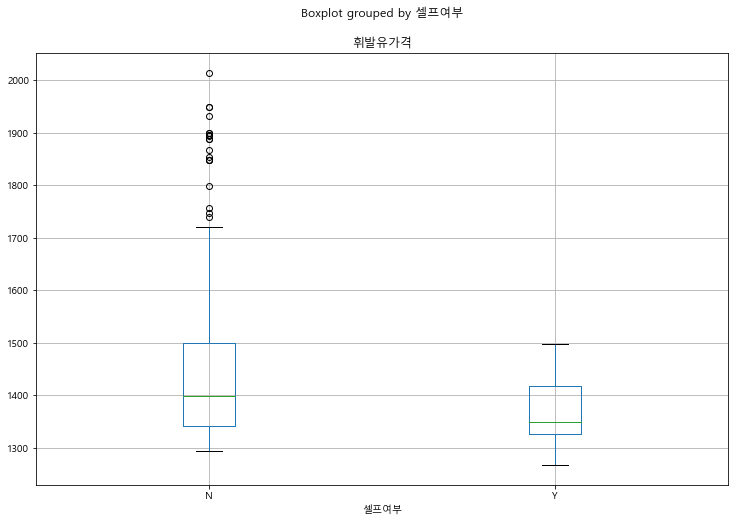

In [27]:
# boxplot 그리기
stations.boxplot(column='휘발유가격', by='셀프여부', figsize=(12,8))

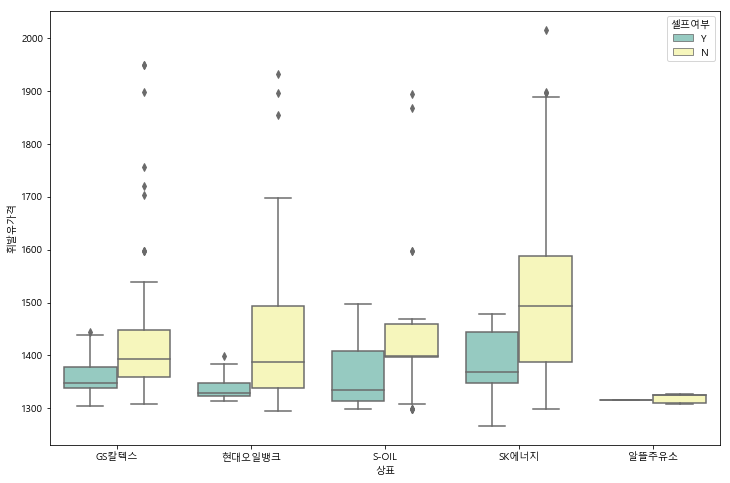

In [31]:
plt.figure(figsize=(12,8))  # 그래프의 크기
sns.boxplot(x='상표', y='휘발유가격', hue = '셀프여부', data=stations, palette='Set3')
plt.show()     # 상표별로 휘발유가격과 셀프여부 boxplot으로 표현

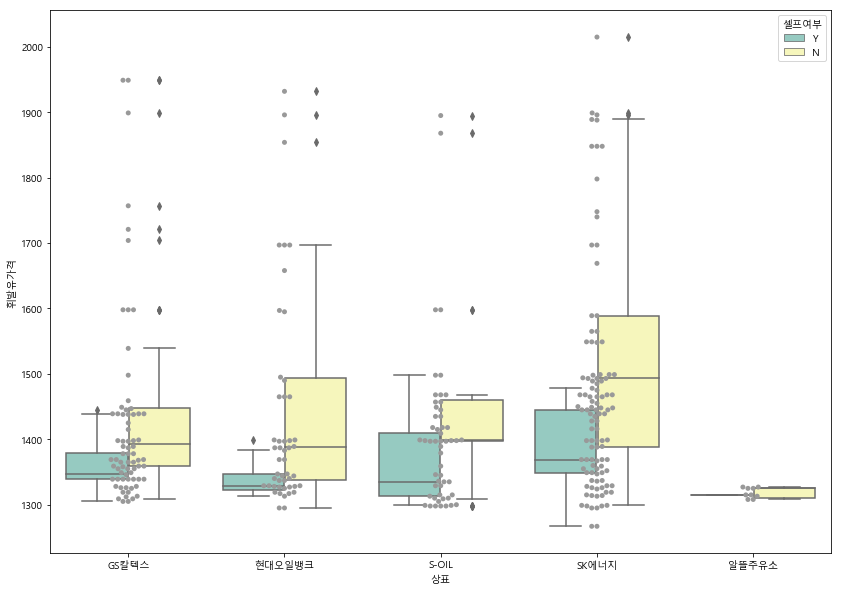

In [32]:
plt.figure(figsize=(14,10))  # 그래프의 크기 조정
sns.boxplot(x='상표', y='휘발유가격', hue = '셀프여부', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='휘발유가격',data=stations, color='0.6')   # 상표별 휘발유가격 swarmplot도 추가
plt.show()